# BasicTauHybridSolver

### Imports

In [2]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [3]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [4]:
model = MichaelisMenten()


### Run Model and plot

In [5]:
%time results = model.run(solver=BasicTauHybridSolver(),number_of_trajectories=3)

CPU times: user 1.47 s, sys: 31.2 ms, total: 1.5 s
Wall time: 1.51 s


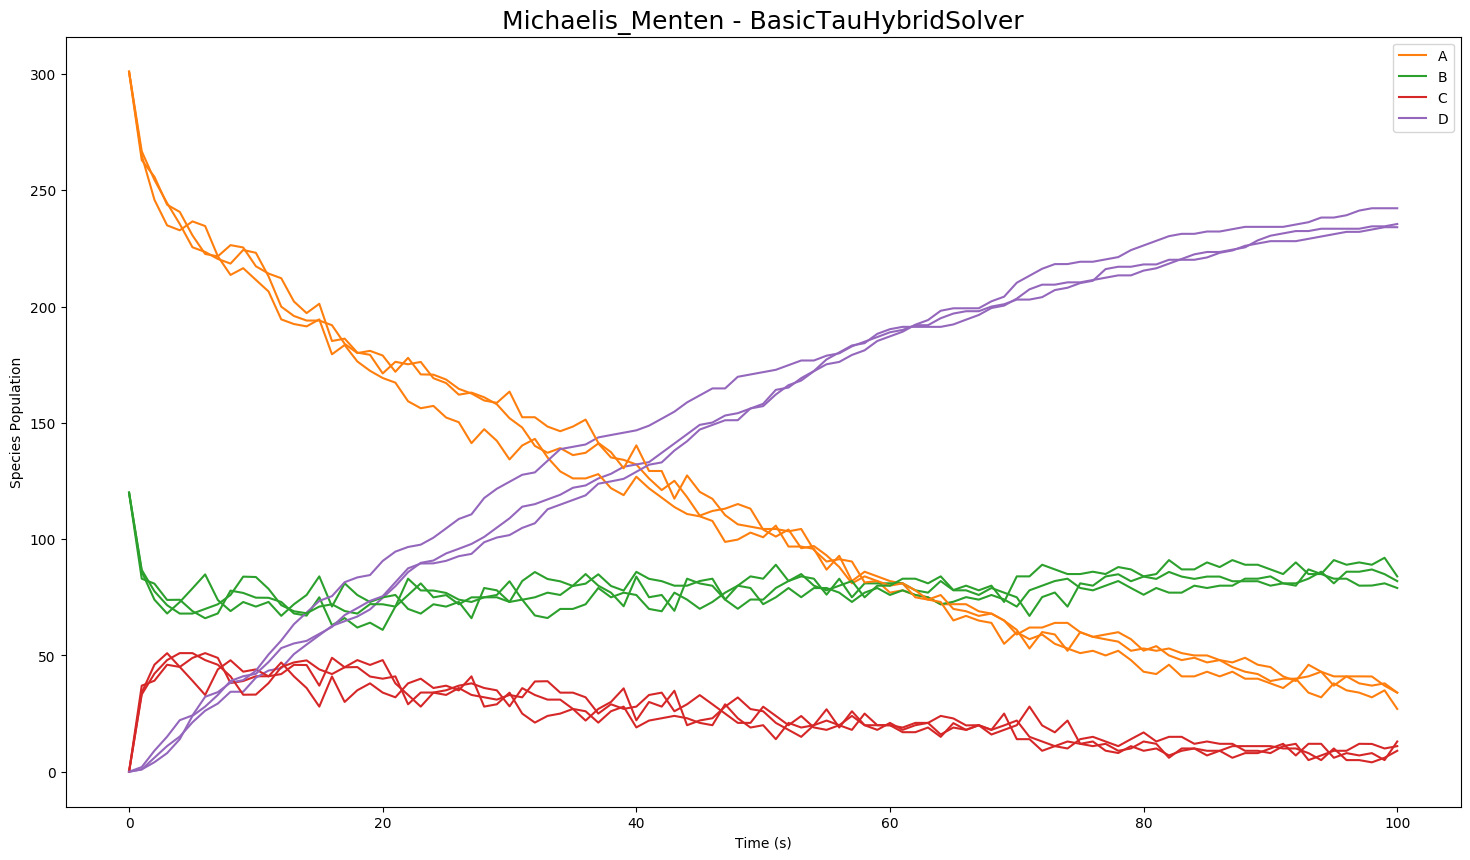

In [6]:
results.plot()

### Save to CSV

Creates a timestamped local directory and writes the results data to .csv files in that directory.

Use a string parameter to tag your directory and .csv files, or leave it out to default to model name.

In [7]:
print(results[0].model.name)

Michaelis_Menten


In [8]:
results.to_csv()

In [10]:
results.to_csv(target_directory='./fish',nametag='cats')

FileNotFoundError: [Errno 2] No such file or directory: './fish/cats1582678622.925621'

In [ ]:
os.mkdir('./fish')